In [1]:
import pandas as pd
from pandas import DataFrame
import requests
import os
import os.path
import datetime as dt
import json
import numpy as np
from datetime import timedelta, datetime
from dateutil import parser
import math

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Set up environment variables
binance_api_key = os.getenv("BINANCE_API_KEY")
binance_secret_key= os.getenv("BINANCE_SECRET_KEY")

from binance.client import Client
binance_client = Client(api_key=binance_api_key, api_secret=binance_secret_key)

In [3]:
# Constants
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750

def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime('1 Jan 2015', '%d %b %Y')
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    return old, new

def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2015', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

In [4]:
# Get chainlink data
link_data_dirty=get_all_binance('LINKBTC', '1d')
link_data=link_data_dirty.loc[:,['close']]
link_data=link_data.rename(columns={'close':'LINK Close'})

All caught up..!


In [5]:
# Get nano data
nano_data_dirty=get_all_binance('NANOBTC', '1d')
nano_data=nano_data_dirty.loc[:,['close']]
nano_data=nano_data.rename(columns={'close':'NANO Close'})

All caught up..!


In [6]:
# Get monero data
xmr_data_dirty=get_all_binance('XMRBTC', '1d')
xmr_data=xmr_data_dirty.loc[:,['close']]
xmr_data=xmr_data.rename(columns={'close':'XMR Close'})

All caught up..!


In [7]:
# Get zilliqa data
zil_data_dirty=get_all_binance('ZILBTC', '1d')
zil_data=zil_data_dirty.loc[:,['close']]
zil_data=zil_data.rename(columns={'close':'ZIL Close'})

All caught up..!


In [8]:
# Get NEO data
neo_data_dirty=get_all_binance('NEOBTC', '1d')
neo_data=neo_data_dirty.loc[:,['close']]
neo_data=neo_data.rename(columns={'close':'NEO Close'})

All caught up..!


In [9]:
# Get cardano data
ada_data_dirty=get_all_binance('ADABTC', '1d')
ada_data=ada_data_dirty.loc[:,['close']]
ada_data=ada_data.rename(columns={'close':'ADA Close'})

All caught up..!


In [10]:
# Get vechain data
vet_data_dirty=get_all_binance('VETBTC', '1d')
vet_data=vet_data_dirty.loc[:,['close']]
vet_data=vet_data.rename(columns={'close':'VET Close'})

All caught up..!


In [11]:
# Get waltonchain data
wtc_data_dirty=get_all_binance('WTCBTC', '1d')
wtc_data=wtc_data_dirty.loc[:,['close']]
wtc_data=wtc_data.rename(columns={'close':'WTC Close'})

All caught up..!


In [12]:
# Get tael data
wabi_data_dirty=get_all_binance('WABIBTC', '1d')
wabi_data=wabi_data_dirty.loc[:,['close']]
wabi_data=wabi_data.rename(columns={'close':'WABI Close'})

All caught up..!


In [13]:
# Concatenate dataframes
df_dirty=pd.concat([link_data,  nano_data, xmr_data, zil_data, neo_data, ada_data, vet_data, wtc_data, wabi_data], axis=1)
df=df_dirty.dropna()
df.head()

,LINK Close,NANO Close,XMR Close,ZIL Close,NEO Close,ADA Close,VET Close,WTC Close,WABI Close
timestamp,,,,,,,,,
2018-07-25,0.00003003,0.00029750,0.01752800,0.00000942,0.00417300,0.00002113,0.00000258,0.00073210,0.00004028
2018-07-26,0.00003167,0.00027920,0.01720000,0.00000923,0.00416800,0.00002069,0.00000315,0.00071500,0.00003900
2018-07-27,0.00003228,0.00027540,0.01714300,0.00000911,0.00408200,0.00002026,0.00000307,0.00075650,0.00003970
2018-07-28,0.00003396,0.00026960,0.01704800,0.00000890,0.00412800,0.00001994,0.00000312,0.00074460,0.00003992
2018-07-29,0.00004009,0.00026580,0.01650200,0.00000879,0.00406700,0.00001980,0.00000322,0.00071170,0.00003889


In [14]:
# Change data types from string to float
df=df.apply(pd.to_numeric)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016656E22988>,
      dtype=object)

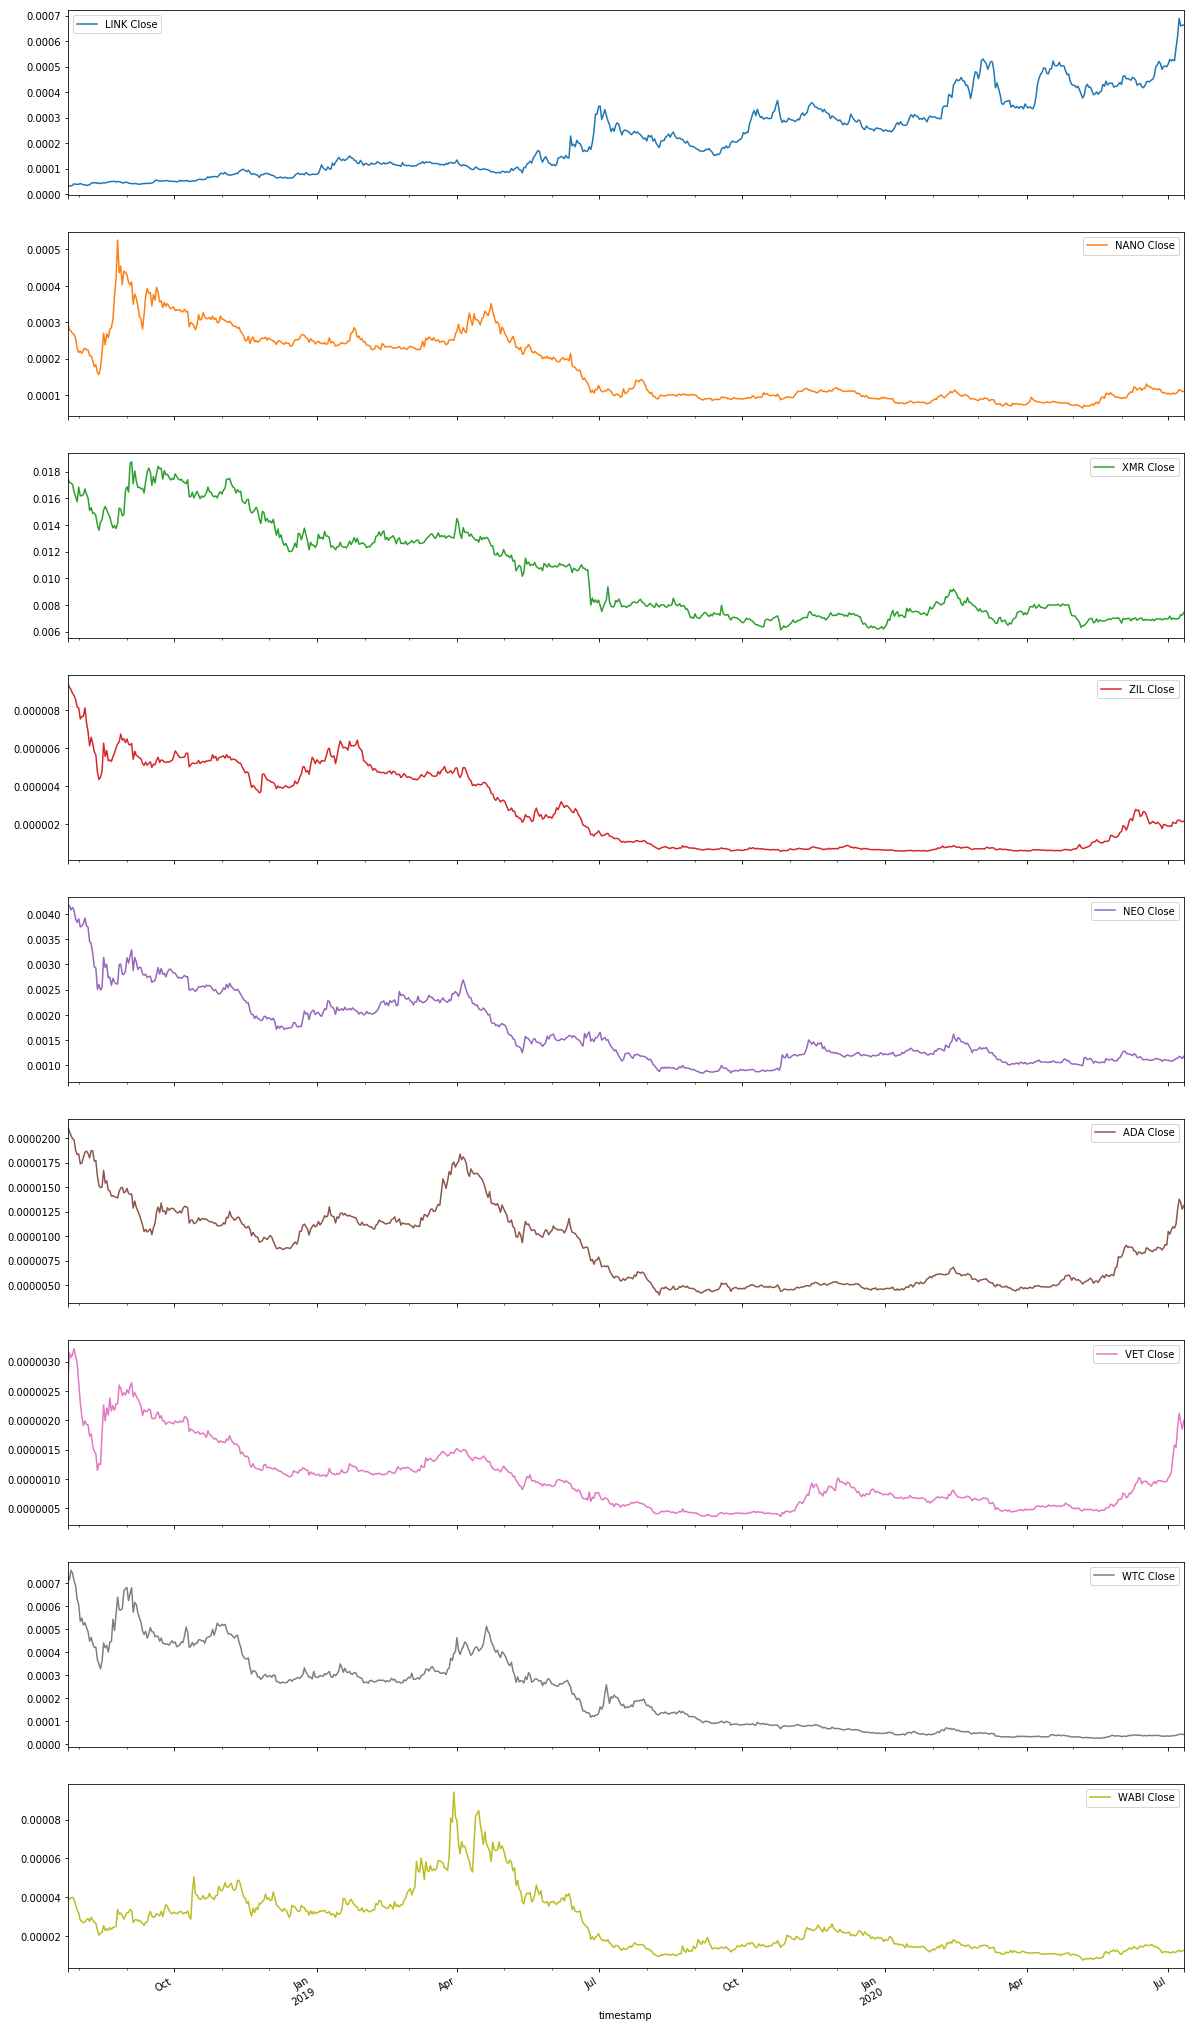

In [15]:
# Plot coin/BTC prices
df.plot(figsize=(20,40), subplots=True)

In [16]:
# Create a daily return dataframe and a lagged return dataframe 
# Returns df will be dependent and lagged returns df will be the independent variable

df_dr=df.pct_change()*100
df_lr_dirty=df_dr.shift()
df_lr=df_lr_dirty.rename(columns={"LINK Close": "LINK Lag", "NANO Close": "NANO Lag", "XMR Close": "XMR Lag", 
                                  "ZIL Close": "ZIL Lag", "NEO Close": "NEO Lag", "ADA Close": "ADA Lag",
                                 "VET Close": "VET Lag", "WTC Close": "WTC Lag", "WABI Close": "WABI Lag"})

# Combine 
df_drlr_dirty=pd.concat([df_dr, df_lr], axis=1)
df_drlr=df_drlr_dirty.dropna()
df_drlr.head()

,LINK Close,NANO Close,XMR Close,ZIL Close,NEO Close,ADA Close,VET Close,WTC Close,WABI Close,LINK Lag,NANO Lag,XMR Lag,ZIL Lag,NEO Lag,ADA Lag,VET Lag,WTC Lag,WABI Lag
timestamp,,,,,,,,,,,,,,,,,,
2018-07-27,1.926113,-1.361032,-0.331395,-1.300108,-2.063340,-2.078299,-2.539683,5.804196,1.794872,5.461205,-6.151261,-1.871292,-2.016985,-0.119818,-2.082347,22.093023,-2.335746,-3.177756
2018-07-28,5.204461,-2.106028,-0.554162,-2.305159,1.126899,-1.579467,1.628664,-1.573034,0.554156,1.926113,-1.361032,-0.331395,-1.300108,-2.063340,-2.078299,-2.539683,5.804196,1.794872
2018-07-29,18.050648,-1.409496,-3.202722,-1.235955,-1.477713,-0.702106,3.205128,-4.418480,-2.580160,5.204461,-2.106028,-0.554162,-2.305159,1.126899,-1.579467,1.628664,-1.573034,0.554156
2018-07-30,-4.365178,-3.950339,-2.302751,-2.502844,-4.081633,-5.303030,-4.037267,-3.147394,-7.585498,18.050648,-1.409496,-3.202722,-1.235955,-1.477713,-0.702106,3.205128,-4.418480,-2.580160
2018-07-31,-0.391236,-10.771641,-2.295001,-4.550758,-1.717508,-2.293333,-3.883495,-8.602931,-7.679466,-4.365178,-3.950339,-2.302751,-2.502844,-4.081633,-5.303030,-4.037267,-3.147394,-7.585498


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016658FBE0C8>,
      dtype=object)

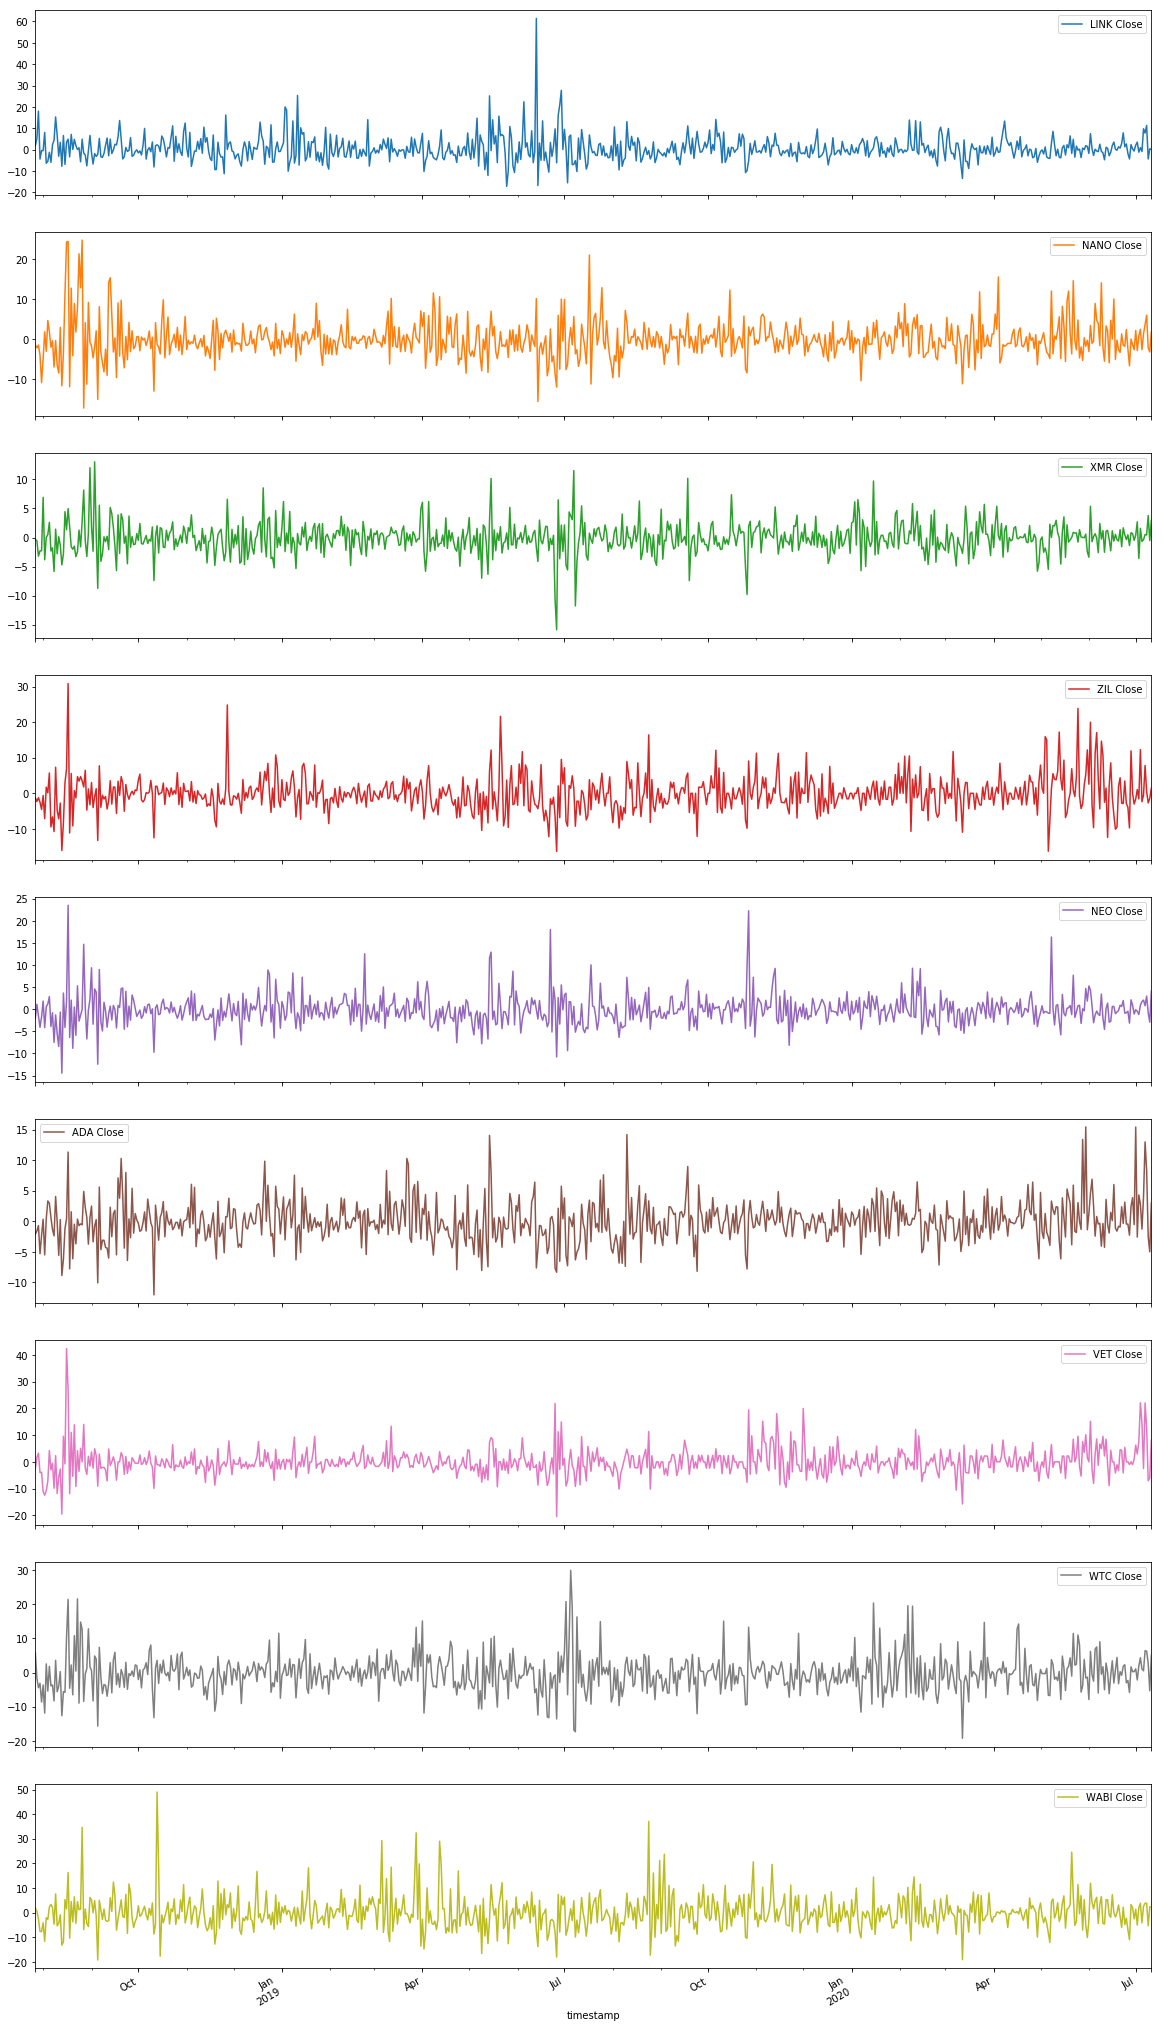

In [17]:
# Plot the columns to gauge trends
df_drlr.iloc[:, :9].plot(subplots=True, figsize=(20, 40))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001665D6F3CC8>,
      dtype=object)

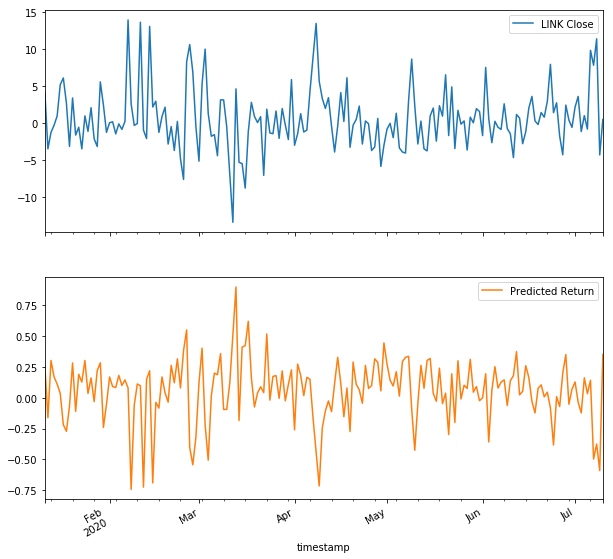

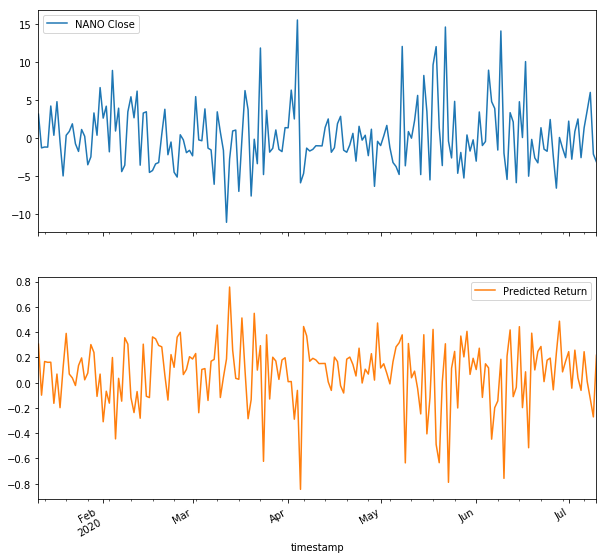

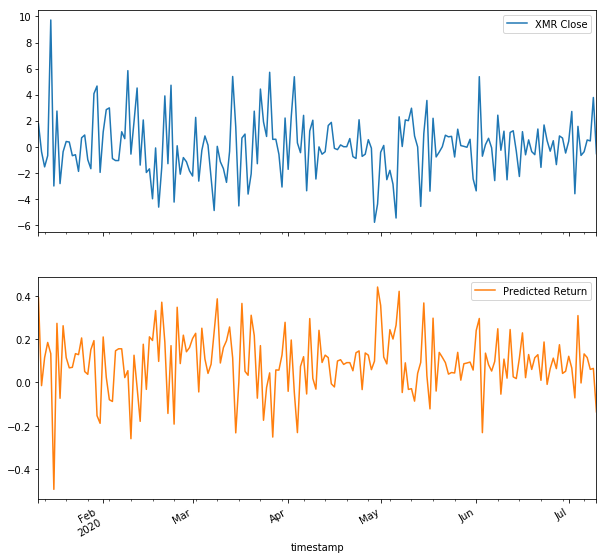

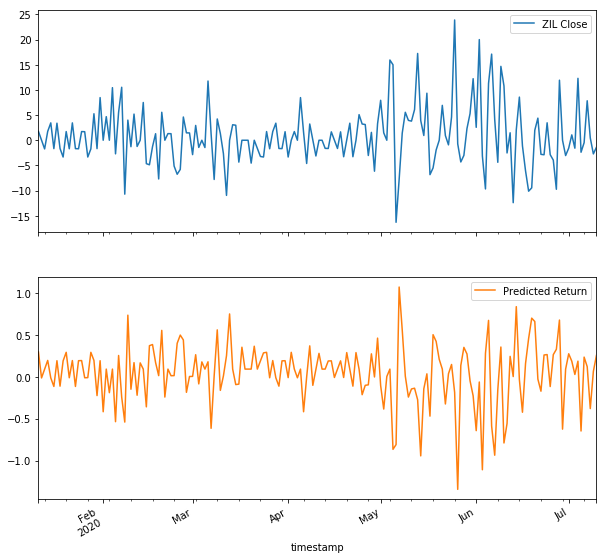

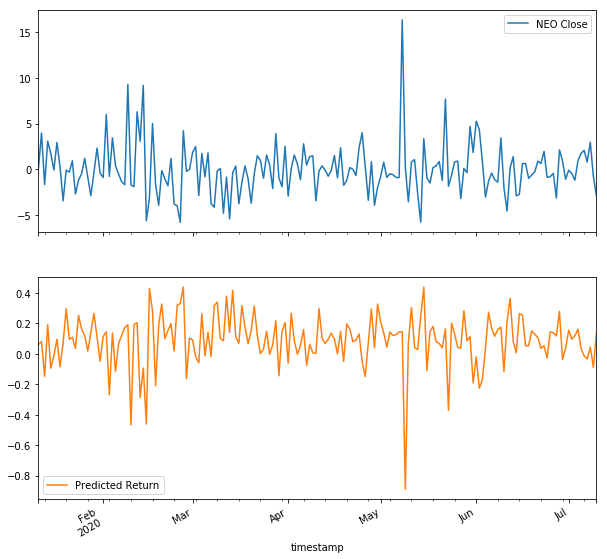

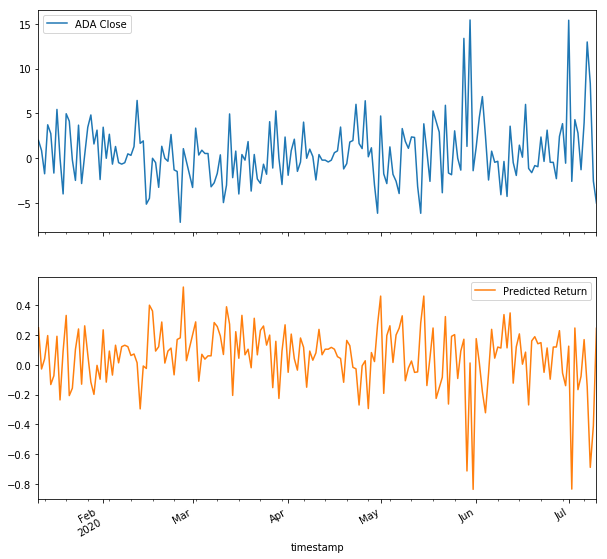

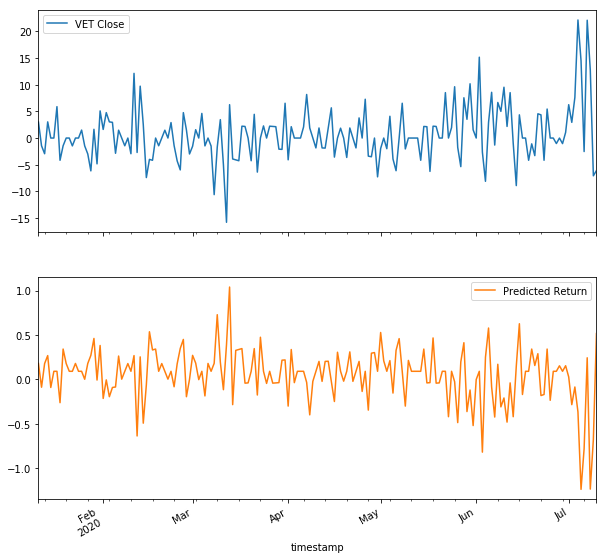

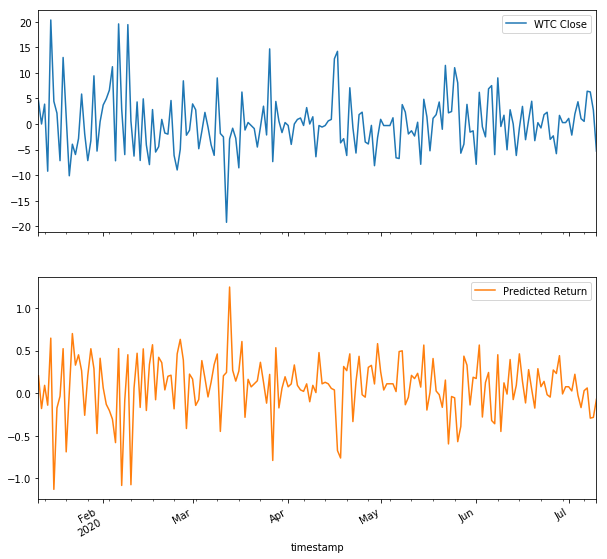

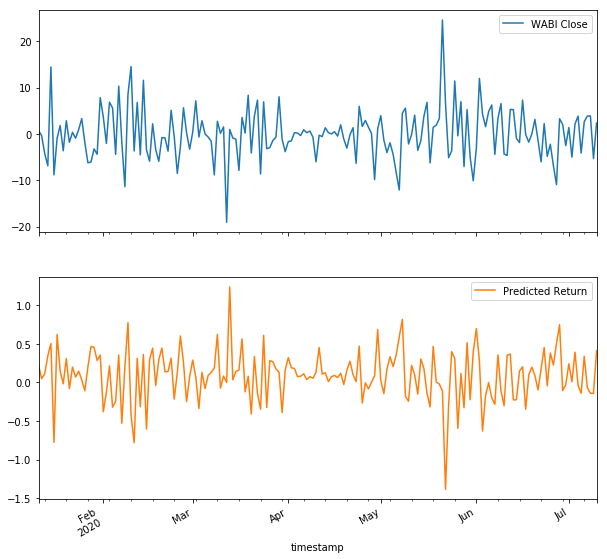

In [18]:
# train/test split
train = df_drlr.iloc[1:-184]
test = df_drlr.iloc[-183:-1]

# Create DataFrames:
X_train_link = train["LINK Lag"].to_frame()
X_train_nano = train["NANO Lag"].to_frame()
X_train_xmr = train["XMR Lag"].to_frame()
X_train_zil = train["ZIL Lag"].to_frame()
X_train_neo = train["NEO Lag"].to_frame()
X_train_ada = train["ADA Lag"].to_frame()
X_train_vet = train["VET Lag"].to_frame()
X_train_wtc = train["WTC Lag"].to_frame()
X_train_wabi = train["WABI Lag"].to_frame()

y_train_link = train["LINK Close"]
y_train_nano = train["NANO Close"]
y_train_xmr = train["XMR Close"]
y_train_zil = train["ZIL Close"]
y_train_neo = train["NEO Close"]
y_train_ada = train["ADA Close"]
y_train_vet = train["VET Close"]
y_train_wtc = train["WTC Close"]
y_train_wabi = train["WABI Close"]

X_test_link = test["LINK Lag"].to_frame()
X_test_nano = test["NANO Lag"].to_frame()
X_test_xmr = test["XMR Lag"].to_frame()
X_test_zil = test["ZIL Lag"].to_frame()
X_test_neo = test["NEO Lag"].to_frame()
X_test_ada = test["ADA Lag"].to_frame()
X_test_vet = test["VET Lag"].to_frame()
X_test_wtc = test["WTC Lag"].to_frame()
X_test_wabi = test["WABI Lag"].to_frame()

y_test_link = test["LINK Close"]
y_test_nano = test["NANO Close"]
y_test_xmr = test["XMR Close"]
y_test_zil = test["ZIL Close"]
y_test_neo = test["NEO Close"]
y_test_ada = test["ADA Close"]
y_test_vet = test["VET Close"]
y_test_wtc = test["WTC Close"]
y_test_wabi = test["WABI Close"]


# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Fit training data to model
model = LinearRegression()
link_model=model.fit(X_train_link, y_train_link)
nano_model=model.fit(X_train_nano, y_train_nano)
xmr_model=model.fit(X_train_xmr, y_train_xmr)
zil_model=model.fit(X_train_zil, y_train_zil)
neo_model=model.fit(X_train_neo, y_train_neo)
ada_model=model.fit(X_train_ada, y_train_ada)
vet_model=model.fit(X_train_vet, y_train_vet)
wtc_model=model.fit(X_train_wtc, y_train_wtc)
wabi_model=model.fit(X_train_wabi, y_train_wabi)

# Make predictions
link_predictions = model.predict(X_test_link)
nano_predictions = model.predict(X_test_nano)
xmr_predictions = model.predict(X_test_xmr)
zil_predictions = model.predict(X_test_zil)
neo_predictions = model.predict(X_test_neo)
ada_predictions = model.predict(X_test_ada)
vet_predictions = model.predict(X_test_vet)
wtc_predictions = model.predict(X_test_wtc)
wabi_predictions = model.predict(X_test_wabi)

# Results
link_results = y_test_link.to_frame()
link_results["Predicted Return"] = link_predictions

nano_results = y_test_nano.to_frame()
nano_results["Predicted Return"] = nano_predictions

xmr_results = y_test_xmr.to_frame()
xmr_results["Predicted Return"] = xmr_predictions

zil_results = y_test_zil.to_frame()
zil_results["Predicted Return"] = zil_predictions

neo_results = y_test_neo.to_frame()
neo_results["Predicted Return"] = neo_predictions

ada_results = y_test_ada.to_frame()
ada_results["Predicted Return"] = ada_predictions

vet_results = y_test_vet.to_frame()
vet_results["Predicted Return"] = vet_predictions

wtc_results = y_test_wtc.to_frame()
wtc_results["Predicted Return"] = wtc_predictions

wabi_results = y_test_wabi.to_frame()
wabi_results["Predicted Return"] = wabi_predictions


link_results.plot(subplots=True, figsize=(10,10))
nano_results.plot(subplots=True, figsize=(10,10))
xmr_results.plot(subplots=True, figsize=(10,10))
zil_results.plot(subplots=True, figsize=(10,10))
neo_results.plot(subplots=True, figsize=(10,10))
ada_results.plot(subplots=True, figsize=(10,10))
vet_results.plot(subplots=True, figsize=(10,10))
wtc_results.plot(subplots=True, figsize=(10,10))
wabi_results.plot(subplots=True, figsize=(10,10))

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Calculate out-of-sample/test MSE, RMSE, R2, ME, MAE, EVS
link_test_mse = mean_squared_error(
    link_results["LINK Close"],
    link_results["Predicted Return"]
)

nano_test_mse = mean_squared_error(
    nano_results["NANO Close"],
    nano_results["Predicted Return"]
)

xmr_test_mse = mean_squared_error(
    xmr_results["XMR Close"],
    xmr_results["Predicted Return"]
)

zil_test_mse = mean_squared_error(
    zil_results["ZIL Close"],
    zil_results["Predicted Return"]
)

neo_test_mse = mean_squared_error(
    neo_results["NEO Close"],
    neo_results["Predicted Return"]
)

ada_test_mse = mean_squared_error(
    ada_results["ADA Close"],
    ada_results["Predicted Return"]
)

vet_test_mse = mean_squared_error(
    vet_results["VET Close"],
    vet_results["Predicted Return"]
)

wtc_test_mse = mean_squared_error(
    wtc_results["WTC Close"],
    wtc_results["Predicted Return"]
)

wabi_test_mse = mean_squared_error(
    wabi_results["WABI Close"],
    wabi_results["Predicted Return"]
)

link_test_rmse = np.sqrt(link_test_mse)
nano_test_rmse = np.sqrt(nano_test_mse)
xmr_test_rmse = np.sqrt(xmr_test_mse)
zil_test_rmse = np.sqrt(zil_test_mse)
neo_test_rmse = np.sqrt(neo_test_mse)
ada_test_rmse = np.sqrt(ada_test_mse)
vet_test_rmse = np.sqrt(vet_test_mse)
wtc_test_rmse = np.sqrt(wtc_test_mse)
wabi_test_rmse = np.sqrt(wabi_test_mse)

link_test_r2=r2_score(y_test_link, link_predictions)
nano_test_r2=r2_score(y_test_nano, nano_predictions)
xmr_test_r2=r2_score(y_test_xmr, xmr_predictions)
zil_test_r2=r2_score(y_test_zil, zil_predictions)
neo_test_r2=r2_score(y_test_neo, neo_predictions)
ada_test_r2=r2_score(y_test_ada, ada_predictions)
vet_test_r2=r2_score(y_test_vet, vet_predictions)
wtc_test_r2=r2_score(y_test_wtc, wtc_predictions)
wabi_test_r2=r2_score(y_test_wabi, wabi_predictions)

link_test_me=max_error(y_test_link, link_predictions)
nano_test_me=max_error(y_test_nano, nano_predictions)
xmr_test_me=max_error(y_test_xmr, xmr_predictions)
zil_test_me=max_error(y_test_zil, zil_predictions)
neo_test_me=max_error(y_test_neo, neo_predictions)
ada_test_me=max_error(y_test_ada, ada_predictions)
vet_test_me=max_error(y_test_vet, vet_predictions)
wtc_test_me=max_error(y_test_wtc, wtc_predictions)
wabi_test_me=max_error(y_test_wabi, wabi_predictions)

link_test_mae=mean_absolute_error(y_test_link, link_predictions)
nano_test_mae=mean_absolute_error(y_test_nano, nano_predictions)
xmr_test_mae=mean_absolute_error(y_test_xmr, xmr_predictions)
zil_test_mae=mean_absolute_error(y_test_zil, zil_predictions)
neo_test_mae=mean_absolute_error(y_test_neo, neo_predictions)
ada_test_mae=mean_absolute_error(y_test_ada, ada_predictions)
vet_test_mae=mean_absolute_error(y_test_vet, vet_predictions)
wtc_test_mae=mean_absolute_error(y_test_wtc, wtc_predictions)
wabi_test_mae=mean_absolute_error(y_test_wabi, wabi_predictions)

link_test_evs=explained_variance_score(y_test_link, link_predictions)
nano_test_evs=explained_variance_score(y_test_nano, nano_predictions)
xmr_test_evs=explained_variance_score(y_test_xmr, xmr_predictions)
zil_test_evs=explained_variance_score(y_test_zil, zil_predictions)
neo_test_evs=explained_variance_score(y_test_neo, neo_predictions)
ada_test_evs=explained_variance_score(y_test_ada, ada_predictions)
vet_test_evs=explained_variance_score(y_test_vet, vet_predictions)
wtc_test_evs=explained_variance_score(y_test_wtc, wtc_predictions)
wabi_test_evs=explained_variance_score(y_test_wabi, wabi_predictions)


# Print results
print("--------------------TEST RESULTS-----------------------")
print("-------------------------------------------------------")
print("--------------------Mean Squared Error-----------------------")
print(f"LINK Mean Squared Error: {link_test_mse}")
print(f"NANO Mean Squared Error: {nano_test_mse}")
print(f"XMR Mean Squared Error: {xmr_test_mse}")
print(f"ZIL Mean Squared Error: {zil_test_mse}")
print(f"NEO Mean Squared Error: {neo_test_mse}")
print(f"ADA Mean Squared Error: {ada_test_mse}")
print(f"VET Mean Squared Error: {vet_test_mse}")
print(f"WTC Mean Squared Error: {wtc_test_mse}")
print(f"WABI Mean Squared Error: {wabi_test_mse}")
print("------------------Root Mean Squared Error---------------------")
print(f"LINK Root Mean Squared Error: {link_test_rmse}")
print(f"NANO Root Mean Squared Error: {nano_test_rmse}")
print(f"XMR Root Mean Squared Error: {xmr_test_rmse}")
print(f"ZIL Root Mean Squared Error: {zil_test_rmse}")
print(f"NEO Root Mean Squared Error: {neo_test_rmse}")
print(f"ADA Root Mean Squared Error: {ada_test_rmse}")
print(f"VET Root Mean Squared Error: {vet_test_rmse}")
print(f"WTC Root Mean Squared Error: {wtc_test_rmse}")
print(f"WABI Root Mean Squared Error: {wabi_test_rmse}")
print("--------------------R2 Score-----------------------")
print(f"LINK R2 Score: {link_test_r2}")
print(f"NANO R2 Score: {nano_test_r2}")
print(f"XMR R2 Score: {xmr_test_r2}")
print(f"ZIL R2 Score: {zil_test_r2}")
print(f"NEO R2 Score: {neo_test_r2}")
print(f"ADA R2 Score: {ada_test_r2}")
print(f"VET R2 Score: {vet_test_r2}")
print(f"WTC R2 Score: {wtc_test_r2}")
print(f"WABI R2 Score: {wabi_test_r2}")
print("--------------------Max Error-----------------------")
print(f"LINK Max Error: {link_test_me}")
print(f"NANO Max Error: {nano_test_me}")
print(f"XMR Max Error: {xmr_test_me}")
print(f"ZIL Max Error: {zil_test_me}")
print(f"NEO Max Error: {neo_test_me}")
print(f"ADA Max Error: {ada_test_me}")
print(f"VET Max Error: {vet_test_me}")
print(f"WTC Max Error: {wtc_test_me}")
print(f"WABI Max Error: {wabi_test_me}")
print("------------------Mean Absolute Error----------------------")
print(f"LINK Mean Absolute Error: {link_test_mae}")
print(f"NANO Mean Absolute Error: {nano_test_mae}")
print(f"XMR Mean Absolute Error: {xmr_test_mae}")
print(f"ZIL Mean Absolute Error: {zil_test_mae}")
print(f"NEO Mean Absolute Error: {neo_test_mae}")
print(f"ADA Mean Absolute Error: {ada_test_mae}")
print(f"VET Mean Absolute Error: {vet_test_mae}")
print(f"WTC Mean Absolute Error: {wtc_test_mae}")
print(f"WABI Mean Absolute Error: {wabi_test_mae}")
print("------------------Explained Variance Score----------------------")
print(f"LINK Explained Variance Score: {link_test_evs}")
print(f"NANO Explained Variance Score: {nano_test_evs}")
print(f"XMR Explained Variance Score: {xmr_test_evs}")
print(f"ZIL Explained Variance Score: {zil_test_evs}")
print(f"NEO Explained Variance Score: {neo_test_evs}")
print(f"ADA Explained Variance Score: {ada_test_evs}")
print(f"VET Explained Variance Score: {vet_test_evs}")
print(f"WTC Explained Variance Score: {wtc_test_evs}")
print(f"WABI Explained Variance Score: {wabi_test_evs}")

--------------------TEST RESULTS-----------------------
-------------------------------------------------------
--------------------Mean Squared Error-----------------------
LINK Mean Squared Error: 17.91184899916619
NANO Mean Squared Error: 18.11083317070283
XMR Mean Squared Error: 5.34620633007903
ZIL Mean Squared Error: 35.22338259899112
NEO Mean Squared Error: 7.852714657467821
ADA Mean Squared Error: 12.490094315050895
VET Mean Squared Error: 25.98666713208893
WTC Mean Squared Error: 31.524385951094562
WABI Mean Squared Error: 29.081842797203546
------------------Root Mean Squared Error---------------------
LINK Root Mean Squared Error: 4.232239241721359
NANO Root Mean Squared Error: 4.255682456516561
XMR Root Mean Squared Error: 2.3121864825482894
ZIL Root Mean Squared Error: 5.934929030661708
NEO Root Mean Squared Error: 2.802269554748048
ADA Root Mean Squared Error: 3.534132752890148
VET Root Mean Squared Error: 5.097711950678356
WTC Root Mean Squared Error: 5.614658133056238
W

# LSTM Neural Network

In [20]:
# Import neural net packages and models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Change data type
link_data_dirty=link_data_dirty.apply(pd.to_numeric)

In [22]:
#Create a new dataframe with only the 'Close' column
data = link_data_dirty.filter(['close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [23]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [24]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_trainlink=[]
y_trainlink = []
for i in range(60,len(train_data)):
    x_trainlink.append(train_data[i-60:i,0])
    y_trainlink.append(train_data[i,0])

In [25]:
#Convert x_train and y_train to numpy arrays
x_trainlink, y_trainlink = np.array(x_trainlink), np.array(y_trainlink)

In [26]:
#Reshape the data into the shape accepted by the LSTM
x_trainlink = np.reshape(x_trainlink, (x_trainlink.shape[0],x_trainlink.shape[1],1))

In [27]:
#Build the LSTM network model
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True,input_shape=(x_trainlink.shape[1],1)))
model2.add(LSTM(units=50, return_sequences=False))
model2.add(Dense(units=25))
model2.add(Dense(units=1))

In [28]:
#Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#Train the model
model2.fit(x_trainlink, y_trainlink, batch_size=1, epochs=5)

Train on 755 samples
Epoch 1/5
755/755 [==============================] - 74s 98ms/sample - loss: 0.0018
Epoch 2/5
755/755 [==============================] - ETA: 0s - loss: 7.4529e-0 - 69s 91ms/sample - loss: 7.4448e-04
Epoch 3/5
755/755 [==============================] - 66s 87ms/sample - loss: 6.2626e-04
Epoch 4/5
755/755 [==============================] - 68s 90ms/sample - loss: 4.9969e-04
Epoch 5/5
755/755 [==============================] - 65s 86ms/sample - loss: 4.5387e-04


In [30]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_testlink = []
y_testlink =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_testlink.append(test_data[i-60:i,0])

In [31]:
#Convert x_test to a numpy array 
x_testlink = np.array(x_testlink)

In [32]:
#Reshape the data into the shape accepted by the LSTM
x_testlink = np.reshape(x_testlink, (x_testlink.shape[0],x_testlink.shape[1],1))

In [33]:
#Getting the models predicted price values
predictions2 = model2.predict(x_testlink) 
predictions2 = scaler.inverse_transform(predictions2)

In [34]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions2)- y_testlink)**2))
rmse

2.169503196775435e-05

In [35]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\palio\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


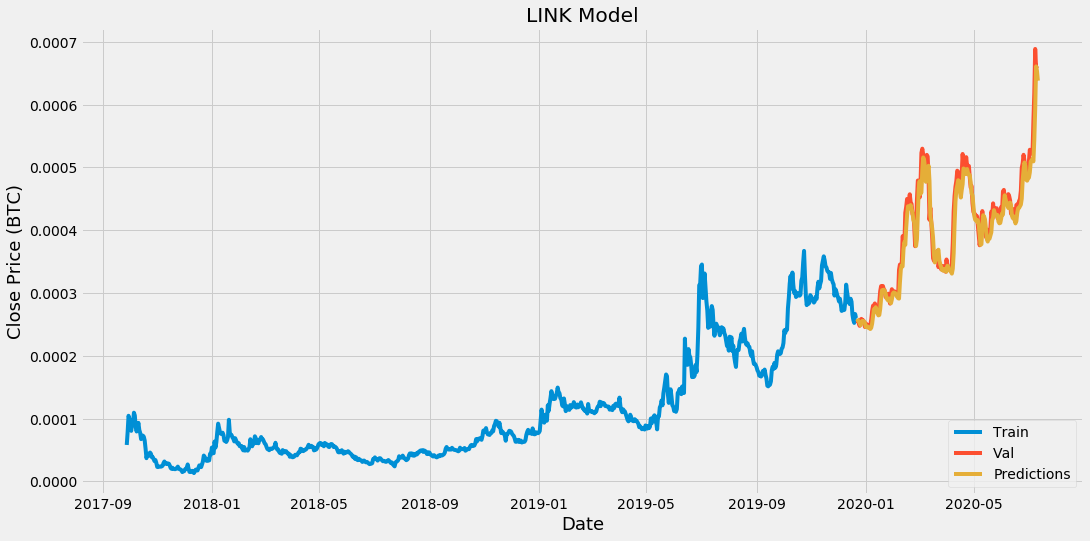

In [36]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions2

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('LINK Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (BTC)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
# 1 month buy and hold strategy pnl
last_price=valid.iloc[-1]['close']
n_days_ago=valid.iloc[-30]['close']
investment=100000

outcome=(1+(last_price-n_days_ago)/n_days_ago)*investment
print(f'A ${investment} investment made 30 days ago would be worth ${outcome:.2f} today')

A $100000 investment made 30 days ago would be worth $153644.57 today
